# Name: Kabi Raj Tiruwa
### Date: August 20, 2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 25.8 points per game  
- 2nd Team: 22.9 points per game  
- 3rd Team: 20.5 points per game  
- All-Star: 21.7 points per game   

**Question 2:** 6 Years  

**Question 3:** 

- Elite: 2 players.  
- All-Star: 1 players.  
- Starter: 16 players.  
- Rotation: 8 players.  
- Roster: 7 players.  
- Out of League: 39 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.9356%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Note you will likely have to change these paths. 
# If your data is in the same folder as this project, 
# the paths will likely be fixed for you by deleting ../../Data/awards_project/ from each string.
awards = pd.read_csv("awards_data.csv")
player_data = pd.read_csv("player_stats.csv")
team_data = pd.read_csv("team_stats.csv")
rebounding_data = pd.read_csv("team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

## 1.1 Preparing Data

- Observing the column in the dataframe, from observation numerous amount of columns are found, So to make it convinient to work with dataframe use only those column which are necessary. 
- Checking null values and duplicate values beacause getting rid of null values and duplicate values make out analysis more precise and accurate.

In [2]:
awards.columns

Index(['season', 'nbapersonid', 'All NBA Defensive First Team',
       'All NBA Defensive Second Team', 'All NBA First Team',
       'All NBA Second Team', 'All NBA Third Team', 'All Rookie First Team',
       'All Rookie Second Team', 'Bill Russell NBA Finals MVP',
       'Player Of The Month', 'Player Of The Week', 'Rookie Of The Month',
       'all_star_game', 'rookie_all_star_game', 'allstar_rk',
       'Defensive Player Of The Year_rk', 'Most Improved Player_rk',
       'Most Valuable Player_rk', 'Rookie Of The Year_rk',
       'Sixth Man Of The Year_rk', 'all_nba_points_rk',
       'all_rookie_points_rk'],
      dtype='object')

In [3]:
awards_df = awards[[ 
                 'nbapersonid',
                 'season',
                 'All NBA First Team',
                 'All NBA Second Team',
                 'All NBA Third Team',
                 'all_star_game']]
print(f'Data types of awards_df:\n{awards_df.dtypes}\n')

Data types of awards_df:
nbapersonid            float64
season                   int64
All NBA First Team     float64
All NBA Second Team    float64
All NBA Third Team     float64
all_star_game           object
dtype: object



In [4]:
print(f'Number of Null Values in awards_df:\n{awards_df.isna().sum()}')
#removing row where nbapersonid is null
awards_df=awards_df.loc[awards_df.dropna(subset=['nbapersonid']).index, :]

Number of Null Values in awards_df:
nbapersonid               8
season                    0
All NBA First Team     3636
All NBA Second Team    3636
All NBA Third Team     3636
all_star_game          3645
dtype: int64


In [5]:
#checking number of null values after removing
print(f'Number of Null Values in awards_df:\n{awards_df.isna().sum()}')


Number of Null Values in awards_df:
nbapersonid               0
season                    0
All NBA First Team     3628
All NBA Second Team    3628
All NBA Third Team     3628
all_star_game          3637
dtype: int64


In [6]:
#checking number of duplicate values
print(f'Number of duplicate values awards_df: {awards_df.duplicated().sum()}')

#removing duplicate values
awards_df = awards_df.drop_duplicates()

Number of duplicate values awards_df: 9


In [7]:
#checking number of duplicate values after removing 
print(f'Number of duplicate values: {awards_df.duplicated().sum()}')

Number of duplicate values: 0


In [8]:
awards_df['nbapersonid'] = awards_df['nbapersonid'].astype(int)

In [9]:
player_data.columns

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'season',
       'nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga',
       'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
       'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
       'blocks', 'tov', 'tot_fouls', 'points', 'PER', 'FTr', 'off_reb_pct',
       'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg', 'OWS', 'DWS', 'WS', 'OBPM', 'DBPM', 'BPM', 'VORP'],
      dtype='object')

In [10]:
player_data_df = player_data[[ 
    'nbapersonid',
    'season',
    'points',
    'games',
    'mins',
    'PER'
]]
player_data_df.dtypes

nbapersonid      int64
season           int64
points           int64
games            int64
mins             int64
PER            float64
dtype: object

In [11]:
print(f'Number of Null Values in player_data_df:\n{player_data_df.isna().sum()}')

Number of Null Values in player_data_df:
nbapersonid    0
season         0
points         0
games          0
mins           0
PER            0
dtype: int64


In [12]:
print(f'Number of duplicate values player_data_df: {player_data_df.duplicated().sum()}')


Number of duplicate values player_data_df: 11


In [13]:
player_data_df = player_data_df.drop_duplicates()
print(f'Number of duplicate values player_data_df: {player_data_df.duplicated().sum()}')

Number of duplicate values player_data_df: 0


## 1.2 Distribution of data in games column and points column.


### Distribution data for Games
- The data has a bimodal distribution, which means we can see two different group in the distribution graph and also the data has two mode.
- The reason for bimodal distribution occurance is because two values are being mostly repeated.


### Distribution data for Points
- The distribution for points data in right-skewed.
- More player has scored less point and very few player has scored more point.  
- In the case mean is greater than median because high frequency of data is to the left which happens when the is no normal distribution. 

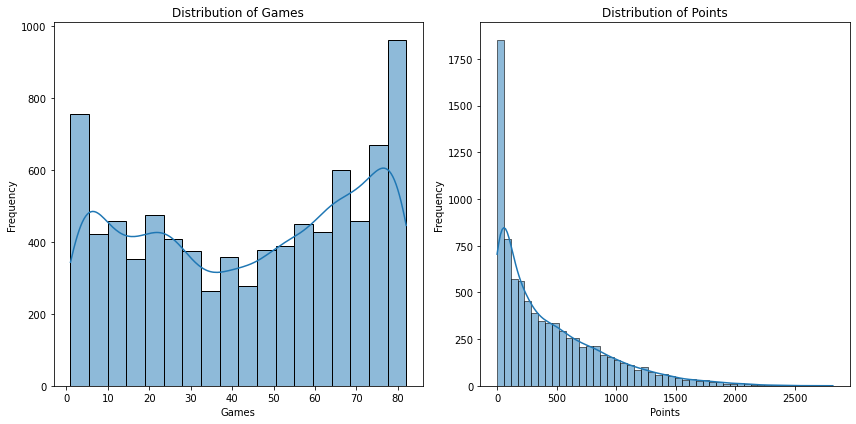

In [14]:
# Assuming player_data_df is your DataFrame containing the required columns

# Set up the figure and axes
plt.figure(figsize=(12, 6))

# Distribution plot for 'games'
plt.subplot(1, 2, 1)
sns.histplot(player_data_df['games'], kde=True)
plt.title('Distribution of Games')
plt.xlabel('Games')
plt.ylabel('Frequency')

# Distribution plot for 'points'
plt.subplot(1, 2, 2)
sns.histplot(player_data_df['points'], kde=True)
plt.title('Distribution of Points')
plt.xlabel('Points')
plt.ylabel('Frequency')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


## 1.3 Merging Data

- All the data needed are prepared now it is merged based on column nbapersonid and season with an inner join.
- Decided to join on nbapersonid and season to avoid repetation of values and get accurate data. 

In [15]:
awards_player_df = pd.merge(awards_df,player_data_df, on=['nbapersonid',
                                                          'season'], how='inner')
awards_player_df.head()

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,points,games,mins,PER
0,708,2007,1.0,0.0,0.0,True,1337,71,2328,25.3
1,947,2007,0.0,0.0,0.0,True,2164,82,3424,20.9
2,948,2007,0.0,0.0,0.0,NaN,721,79,2758,17.2
3,959,2007,0.0,1.0,0.0,True,1371,81,2780,21.1
4,977,2007,1.0,0.0,0.0,True,2323,82,3192,24.2


## 1.4 Extracting Data 

- From the above merged dataframe created four new dataframes.
- first_team: Dataframe with rows with data of player who were selected in All NBA first Team.
- second_team: Dataframe with rows with data of player who were selected in All NBA second Team.
- third_team: Dataframe with rows with data of player who were selected in All NBA third Team.
- all_star: Dataframe with rows with data of player who were selected for All Star Games.

In [16]:
first_team = awards_player_df[awards_player_df['All NBA First Team'] == 1.0][['nbapersonid', 
                                                                              'All NBA First Team',
                                                                              'points',
                                                                              'games',
                                                                              'season',
                                                                              'mins',
                                                                              'PER'
                                                                             ]]

second_team = awards_player_df[awards_player_df['All NBA Second Team'] == 1.0][['nbapersonid', 
                                                                                'All NBA Second Team',
                                                                                'points',
                                                                                'games',
                                                                                'season',
                                                                                'mins',
                                                                                'PER'
                                                                               ]]

third_team = awards_player_df[awards_player_df['All NBA Third Team'] == 1.0][['nbapersonid', 
                                                                              'All NBA Third Team',
                                                                             'points',
                                                                             'games',
                                                                              'season',
                                                                              'mins',
                                                                              'PER'
                                                                             ]]

all_star = awards_player_df[awards_player_df['all_star_game'] == True][['nbapersonid', 
                                                                        'all_star_game',
                                                                       'points',
                                                                       'games',
                                                                        'season',
                                                                        'mins',
                                                                        'PER'
                                                                       ]]

## 1.5 Visualization

- Using above dataframe to create visualization to see if something seperates them based on the data split we made for All NBA first second and third team.
- Average points per season, Mins player and PER(Player efficiency rating) in used to draw this visulization.

In [17]:
first_team_avg_points = first_team.groupby('season')['points'].mean().reset_index()
first_team_avg_mins = first_team.groupby('season')['mins'].mean().reset_index()
first_team_avg_PER = first_team.groupby('season')['PER'].mean().reset_index()

second_team_avg_points = second_team.groupby('season')['points'].mean().reset_index()
second_team_avg_mins = second_team.groupby('season')['mins'].mean().reset_index()
second_team_avg_PER = second_team.groupby('season')['PER'].mean().reset_index()

third_team_avg_points = third_team.groupby('season')['points'].mean().reset_index()
third_team_avg_mins = third_team.groupby('season')['mins'].mean().reset_index()
third_team_avg_PER = third_team.groupby('season')['PER'].mean().reset_index()

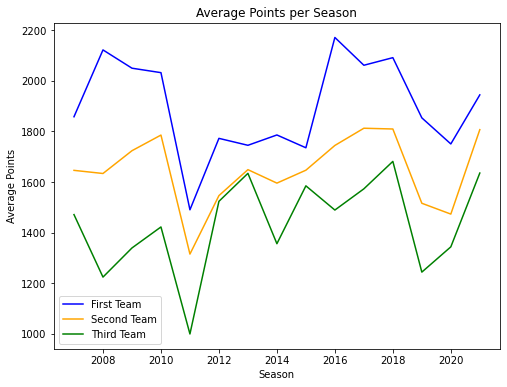

In [18]:
fig, ax1 = plt.subplots(figsize=(8, 6))  # Set the figure size

ax1.plot(first_team_avg_points['season'], 
         first_team_avg_points['points'], 
         color='blue', 
         label='First Team')

ax1.plot(second_team_avg_points['season'], 
         second_team_avg_points['points'], 
         color='orange',
         label='Second Team')

ax1.plot(third_team_avg_points['season'], 
         third_team_avg_points['points'], 
         color='green',
         label='Third Team')

ax1.set_title('Average Points per Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Points')
ax1.legend()

plt.show()

Based on the visualization provided, it can be inferred that players chosen for the All NBA First Team outscore those selected for the All NBA Second Team. Similarly, those in the All NBA Second Team outscore players from the All NBA Third Team.

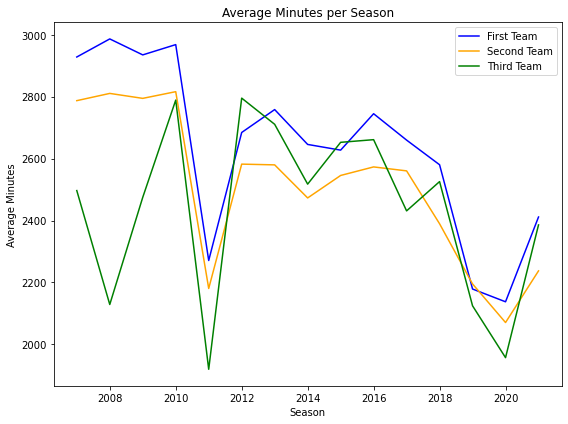

In [19]:
fig, ax1 = plt.subplots(figsize=(8, 6))  # Set the figure size

# Plotting the data for the first team
ax1.plot(first_team_avg_mins['season'], 
         first_team_avg_mins['mins'], 
         color='blue', 
         label='First Team')

# Plotting the data for the second team
ax1.plot(second_team_avg_mins['season'], 
         second_team_avg_mins['mins'], 
         color='orange',
         label='Second Team')

# Plotting the data for the third team
ax1.plot(third_team_avg_mins['season'], 
         third_team_avg_mins['mins'], 
         color='green',
         label='Third Team')

ax1.set_title('Average Minutes per Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average Minutes')
ax1.legend()

plt.tight_layout()  # Improve spacing
plt.show()

According to the presented visualization, during 2007 and 2008, players chosen for the All NBA First Team played more minutes compared to those in the All NBA Second Team. Additionally, players from the All NBA Second Team played more minutes than those in the All NBA Third Team. However, this pattern did not continue from the start of 2010.

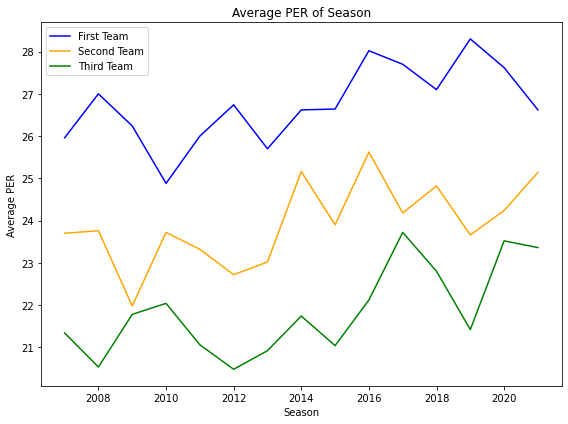

In [20]:
fig, ax1 = plt.subplots(figsize=(8, 6))  # Set the figure size

# Plotting the data for the first team
ax1.plot(first_team_avg_PER['season'], 
         first_team_avg_PER['PER'], 
         color='blue', 
         label='First Team')

# Plotting the data for the second team
ax1.plot(second_team_avg_PER['season'], 
         second_team_avg_PER['PER'], 
         color='orange',
         label='Second Team')

# Plotting the data for the third team
ax1.plot(third_team_avg_PER['season'], 
         third_team_avg_PER['PER'], 
         color='green',
         label='Third Team')

ax1.set_title('Average PER of Season')
ax1.set_xlabel('Season')
ax1.set_ylabel('Average PER')
ax1.legend()

plt.tight_layout()  # Improve spacing
plt.show()

The visualization above distinctly illustrates the PER ratings of players in the All NBA first, second, and third teams are entirely distinct, underscoring that players in the All NBA first team demonstrate notably high efficiency.

## 1.6 Average Point Calculation

- The average is computed by using the formula of dividing the sum of points scored by the number of games played by the player selected for the respected category.

In [21]:
first_nba_ppg = sum(first_team.points)/sum(first_team.games)
first_nba_ppg = round(first_nba_ppg, 1)

print(f'\nAverage Points Socred by All nba first team from season 2007-2021:\n{first_nba_ppg}')


Average Points Socred by All nba first team from season 2007-2021:
25.8


In [22]:
second_nba_ppg = sum(second_team.points)/sum(second_team.games)
second_nba_ppg = round(second_nba_ppg, 1)

print(f'\nAverage Points Socred by all nba second team from season 2007-2021:\n{second_nba_ppg}')


Average Points Socred by all nba second team from season 2007-2021:
22.9


In [23]:
third_nba_ppg = sum(third_team.points)/sum(third_team.games)
third_nba_ppg = round(third_nba_ppg, 1)

print(f'\nAverage Points Socred by All nba third team from season 2007-2021:\n{third_nba_ppg}')



Average Points Socred by All nba third team from season 2007-2021:
20.5


In [24]:
all_star_nba_ppg = sum(all_star.points)/sum(all_star.games)
all_star_nba_ppg = round(all_star_nba_ppg, 1)

print(f'\nAverage Points Socred by All nba third team from season 2007-2021:\n{all_star_nba_ppg}')


Average Points Socred by All nba third team from season 2007-2021:
21.7


<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: <strong>25.8</strong> points per game  
2nd Team: <strong>22.9</strong> points per game  
3rd Team: <strong>20.5</strong> points per game  
All-Star: <strong>21.7</strong> points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



## 2.1 Data Preparation 

- To find out how many years of experience, on average, players have in the league before making their first All NBA Selection, we look at all the players who were chosen for the All NBA First, Second, and Third teams. 
- As per the question narrows down the analysis to players who were drafted in the year 2007 by creating a dataframe specifically for them.
- Take only the columns necessary for the calculation of the process. So that it is easier to work with.

In [25]:
draft_df = player_data[[ 
                 'nbapersonid',
                 'season',
                 'draftyear']]
draft_df.dtypes

nbapersonid    int64
season         int64
draftyear      int64
dtype: object

In [26]:
all_nba_df = awards[[ 
                 'nbapersonid',
                 'season',
                 'All NBA First Team',
                 'All NBA Second Team',
                 'All NBA Third Team']]
print(f'{awards_df.dtypes}\n')

nbapersonid              int64
season                   int64
All NBA First Team     float64
All NBA Second Team    float64
All NBA Third Team     float64
all_star_game           object
dtype: object



In [27]:
all_nba_draft_df = pd.merge(all_nba_df,draft_df, on=['nbapersonid','season'], how='inner')
all_nba_draft_df

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,draftyear
0,708.0,2007,1.0,0.0,0.0,1995
1,947.0,2007,0.0,0.0,0.0,1996
2,948.0,2007,0.0,0.0,0.0,1996
3,959.0,2007,0.0,1.0,0.0,1996
4,977.0,2007,1.0,0.0,0.0,1996
...,...,...,...,...,...,...
4511,1626170.0,2015,NaN,NaN,NaN,2015
4512,1626202.0,2015,NaN,NaN,NaN,2015
4513,1626273.0,2015,NaN,NaN,NaN,2005
4514,1628971.0,2018,NaN,NaN,NaN,2018


In [28]:
all_nba_draft_df.isna().sum()

nbapersonid               0
season                    0
All NBA First Team     3803
All NBA Second Team    3803
All NBA Third Team     3803
draftyear                 0
dtype: int64

In [29]:
all_nba_draft_df= all_nba_draft_df.loc[(all_nba_draft_df['All NBA First Team']>=1.0)| 
                     (all_nba_draft_df['All NBA Second Team']==1.0)|
                     (all_nba_draft_df['All NBA Third Team']==1.0) & 
                     (all_nba_draft_df['draftyear']>=2007),
                     ['nbapersonid',
                      'season',
                      'All NBA First Team',
                      'All NBA Second Team',
                      'All NBA Third Team',
                      'draftyear']]

## 2.2 Additional Column

- A new column with years of experiece is create to now since drafted how many years it took for the player to make the All NBA selection.  
- If the player was drafted in 1995 that years is also considered the year he played.

<strong><span style="color:red">Problem:</span></strong>  
- If a player has achieved All NBA selection multiple times, their years of experience will also appear multiple times. For instance, if a player was drafted in 2008 and made the All NBA team in both 2015 and 2016, there would be two entries in the table, each corresponding to a different year of experience. 

<strong><span style="color:green">Solution:</span></strong>  
- In this scenario, we choose the value of years of experience that is the lowest, as it represents the player's first All NBA selection year.


In [30]:
#calculating years of exerience of player who made all
all_nba_draft_df['yoe_allnba'] = all_nba_draft_df['season'] - all_nba_draft_df['draftyear'] + 1

In [31]:
all_nba_draft_df

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,draftyear,yoe_allnba
0,708.0,2007,1.0,0.0,0.0,1995,13
3,959.0,2007,0.0,1.0,0.0,1996,12
4,977.0,2007,1.0,0.0,0.0,1996,12
6,1495.0,2007,0.0,1.0,0.0,1997,11
10,1717.0,2007,0.0,1.0,0.0,1998,10
...,...,...,...,...,...,...,...
686,1627783.0,2021,0.0,0.0,1.0,2016,6
688,1628369.0,2021,1.0,0.0,0.0,2017,5
696,1629027.0,2021,0.0,0.0,1.0,2018,4
697,1629029.0,2021,1.0,0.0,0.0,2018,4


In [32]:
all_nba_draft_df.sort_values(by=["nbapersonid","season"]) 

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,draftyear,yoe_allnba
0,708.0,2007,1.0,0.0,0.0,1995,13
3,959.0,2007,0.0,1.0,0.0,1996,12
97,959.0,2009,0.0,1.0,0.0,1996,14
4,977.0,2007,1.0,0.0,0.0,1996,12
52,977.0,2008,1.0,0.0,0.0,1996,13
...,...,...,...,...,...,...,...
696,1629027.0,2021,0.0,0.0,1.0,2018,4
608,1629029.0,2019,1.0,0.0,0.0,2018,2
650,1629029.0,2020,1.0,0.0,0.0,2018,3
697,1629029.0,2021,1.0,0.0,0.0,2018,4


In [33]:
all_nba_draft_df = all_nba_draft_df.loc[all_nba_draft_df.groupby('nbapersonid')['season'].idxmin()]
all_nba_draft_df.shape

(60, 7)

In [34]:
average_years = round(all_nba_draft_df['yoe_allnba'].mean())
print(f'Average years: {average_years}')

Average years: 6


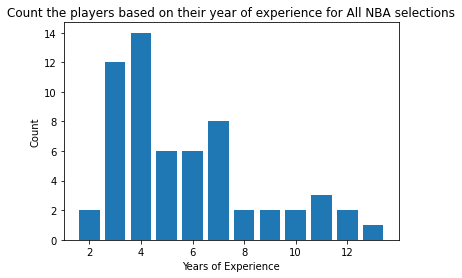

In [35]:
grouped_data = all_nba_draft_df.groupby('yoe_allnba')['yoe_allnba'].agg('count')

# Plotting the data
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.title('Count the players based on their year of experience for All NBA selections')
plt.show()

## 2.3 Conclusion

The visualization above indicates that players have achieved All NBA Selections quite early in their careers, implying that the league is populated with young players and is currently the league is young.

<strong><span style="color:red">ANSWER 2:</span></strong>  

<strong>6</strong> Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

## 3.1 Preparing & Exploring Data

As per the question selecting only the player who were drafted in 2010 to classify their career into 6 category.
- Elite
- All-Star
- Starter
- Rotation
- Roster
- Out of the League

Initially, we focus on extracting the necessary columns for our calculations. This involves inspecting the data's datatypes, identifying and eliminating any null values, and addressing duplicate entries if necessary. 
Created two refined dataframes, ready for merging. This consolidation results in a single, convenient  dataframe for data analysis.

In [36]:
career_df = awards[[ 
                 'nbapersonid',
                 'season',
                 'All NBA First Team',
                 'All NBA Second Team',
                 'All NBA Third Team','all_star_game',
                 'Defensive Player Of The Year_rk',
                 'Most Valuable Player_rk',
                 'all_star_game',
]]
career_df.dtypes


nbapersonid                        float64
season                               int64
All NBA First Team                 float64
All NBA Second Team                float64
All NBA Third Team                 float64
all_star_game                       object
Defensive Player Of The Year_rk    float64
Most Valuable Player_rk            float64
all_star_game                       object
dtype: object

In [37]:
print(f'Duplicate Value Before: {career_df.duplicated().sum()}')
career_df = career_df.drop_duplicates()
print(f'Duplicate Value After: {career_df.duplicated().sum()}\n')

Duplicate Value Before: 12
Duplicate Value After: 0



In [38]:
print(f'Number of Null Values in career_df before:\n{career_df.isna().sum()}')

Number of Null Values in career_df before:
nbapersonid                           5
season                                0
All NBA First Team                 3624
All NBA Second Team                3624
All NBA Third Team                 3624
all_star_game                      3633
Defensive Player Of The Year_rk    4062
Most Valuable Player_rk            4115
all_star_game                      3633
dtype: int64


In [39]:
career_df=career_df.loc[career_df.dropna(subset=['nbapersonid']).index, :]
print(f'\nNumber of Null Values in career_df after:\n{career_df.isna().sum()}')


Number of Null Values in career_df after:
nbapersonid                           0
season                                0
All NBA First Team                 3619
All NBA Second Team                3619
All NBA Third Team                 3619
all_star_game                      3628
Defensive Player Of The Year_rk    4057
Most Valuable Player_rk            4110
all_star_game                      3628
dtype: int64


In [40]:
players_df = player_data[[ 
    'nbapersonid',
    'season',
    'draftyear',
    'games',
    'games_start',
    'mins']]
players_df.dtypes

nbapersonid    int64
season         int64
draftyear      int64
games          int64
games_start    int64
mins           int64
dtype: object

In [41]:
print(f'Duplicate Value Before in players_df: {players_df.duplicated().sum()}')
players_df = players_df.drop_duplicates()
print(f'Duplicate Value After inplayers_df: {players_df.duplicated().sum()}')

Duplicate Value Before in players_df: 11
Duplicate Value After inplayers_df: 0


In [42]:
print(f'Number of Null Values in players_df before:\n{players_df.isna().sum()}')

Number of Null Values in players_df before:
nbapersonid    0
season         0
draftyear      0
games          0
games_start    0
mins           0
dtype: int64


In [43]:
players_df=players_df.loc[players_df.dropna(subset=['nbapersonid']).index, :]
print(f'\nNumber of Null Values in players_df after:\n{players_df.isna().sum()}')


Number of Null Values in players_df after:
nbapersonid    0
season         0
draftyear      0
games          0
games_start    0
mins           0
dtype: int64


## 3.2 Merging Data 

- Two dataframes career_df and players_df are merged on two column nbapersonid and season with right beacause we want all the records from players_df dataframe. So that we doing miss any player.
- Duplicate values are check and repeating columns were removed that resulted from merging. 
- Player who were drafted in 2010 were only selected. 


In [44]:
career_outcome_df = pd.merge(career_df,players_df, on=['nbapersonid','season'], how='right')
print(f'Duplicate Value After Merge: {career_outcome_df.duplicated().sum()}')

Duplicate Value After Merge: 0


In [45]:
career_outcome_df = career_outcome_df.loc[:, ~career_outcome_df.columns.duplicated()]

In [46]:
career_outcome_df = career_outcome_df.sort_values(by=["nbapersonid",
                                                      'season']) 


In [47]:
career_outcome_df = career_outcome_df[career_outcome_df['draftyear'] == 2010]
career_outcome_df.head()


,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins
2084,202322.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,69,64,2606
2596,202322.0,2011,NaN,NaN,NaN,False,NaN,NaN,2010,66,66,2386
3118,202322.0,2012,0.0,0.0,0.0,NaN,NaN,NaN,2010,49,42,1602
3674,202322.0,2013,0.0,0.0,0.0,True,NaN,NaN,2010,82,82,2980
4252,202322.0,2014,0.0,0.0,0.0,True,NaN,NaN,2010,79,79,2837


In [48]:
career_outcome_df = career_outcome_df.sort_values(by=["nbapersonid",
                                                      "season"]) 

## 3.3 Duplicate Values

<strong><span style="color:red">Problem:</span></strong>  
- While analyzing the data, numerous duplicate values were observed. Further investigation revealed that these duplicates could be attributed to mid-season trades, where players were transferred to different teams during the middle of a season. This led to instances where players participated for two different teams within the same season, resulting in additional rows in the table due to varying game counts, points scored, mins player and many mrore for each team.

<strong><span style="color:green">Solution:</span></strong>  
- What can be done is to consider instances where players played for two different teams as a single output for a given year. The current analysis doesn't center on teams, so we grouped the rows based on the NBA person ID and season. We summed all the relevant columns, and for columns where summation wasn't possible, we kept the common values across those columns.

In [49]:
#only observing duplicated values
duplicates = career_outcome_df.duplicated(subset=['nbapersonid', 
                                                  'season'], 
                                          keep=False)

duplicate_rows = career_outcome_df[duplicates]
duplicate_rows.shape

(114, 12)

In [50]:
duplicate_rows.head()

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins
3336,202323.0,2013,NaN,NaN,NaN,NaN,NaN,NaN,2010,27,2,571
3551,202323.0,2013,NaN,NaN,NaN,NaN,NaN,NaN,2010,54,54,1886
1572,202324.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,56,23,1091
2065,202324.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,22,4,444
6315,202325.0,2018,NaN,NaN,NaN,NaN,NaN,NaN,2010,26,13,377


In [51]:
player_examine_df = player_data[[ 
    'nbapersonid',
    'season',
    'team',
    'draftyear',
    'games',
    'games_start',
    'mins']]
dup_data = player_examine_df.duplicated(subset=['nbapersonid', 'season'], keep=False)
player_examine_df = player_examine_df[dup_data]
player_examine_df = player_examine_df[player_examine_df['draftyear'] == 2010]
player_examine_df.sort_values(by=["nbapersonid","season"]) 

,nbapersonid,season,team,draftyear,games,games_start,mins
3338,202323,2013,IND,2010,27,2,571
3553,202323,2013,PHI,2010,54,54,1886
1572,202324,2010,BKN,2010,56,23,1091
2065,202324,2010,UTA,2010,22,4,444
6322,202325,2018,NOP,2010,26,13,377
...,...,...,...,...,...,...,...
4124,203144,2014,PHI,2010,17,0,285
5506,1626246,2017,DET,2010,19,1,171
5594,1626246,2017,LAC,2010,20,0,166
6179,1626246,2018,LAC,2010,36,9,376


In [52]:
career_outcome_df=career_outcome_df.sort_values(by=["nbapersonid","season"]) 

In [53]:
# Combining column based on nbapersonid and season
# taking doing sum in some columns and taking common values in some columns

agg_funcs = {
    'All NBA First Team': 'first',  
    'All NBA Second Team': 'first',
    'All NBA Third Team': 'first',
    'all_star_game': 'first',
    'Defensive Player Of The Year_rk': 'first',
    'Most Valuable Player_rk': 'first',
    'draftyear': 'first',
    'games': 'sum',
    'games_start': 'sum',
    'mins': 'sum'
}

career_outcome_df = career_outcome_df.groupby(['nbapersonid', 'season']).agg(agg_funcs).reset_index()
career_outcome_df

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins
0,202322.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,69,64,2606
1,202322.0,2011,NaN,NaN,NaN,False,NaN,NaN,2010,66,66,2386
2,202322.0,2012,0.0,0.0,0.0,None,NaN,NaN,2010,49,42,1602
3,202322.0,2013,0.0,0.0,0.0,True,NaN,NaN,2010,82,82,2980
4,202322.0,2014,0.0,0.0,0.0,True,NaN,NaN,2010,79,79,2837
...,...,...,...,...,...,...,...,...,...,...,...,...
371,1626246.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,44,5,422
372,1626246.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,33,3,271
373,1626246.0,2021,NaN,NaN,NaN,None,NaN,NaN,2010,23,0,128
374,1626780.0,2016,NaN,NaN,NaN,None,NaN,NaN,2010,17,0,231


## 3.4 Column Addition

A new column, "career year," is introduced, which is grouped by NBA season ID and season. The year they were drafted is counted as their first year, and subsequent years are incremented accordingly.

In [54]:
career_outcome_df['co_years'] = career_outcome_df.groupby('nbapersonid')['season'].rank(method='first').astype(int)
career_outcome_df.head(12)

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins,co_years
0,202322.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,69,64,2606,1
1,202322.0,2011,NaN,NaN,NaN,False,NaN,NaN,2010,66,66,2386,2
2,202322.0,2012,0.0,0.0,0.0,None,NaN,NaN,2010,49,42,1602,3
3,202322.0,2013,0.0,0.0,0.0,True,NaN,NaN,2010,82,82,2980,4
4,202322.0,2014,0.0,0.0,0.0,True,NaN,NaN,2010,79,79,2837,5
5,202322.0,2015,0.0,0.0,0.0,True,NaN,NaN,2010,77,77,2784,6
6,202322.0,2016,0.0,0.0,1.0,True,NaN,7.0,2010,78,78,2836,7
7,202322.0,2017,NaN,NaN,NaN,True,NaN,NaN,2010,41,41,1410,8
8,202322.0,2018,NaN,NaN,NaN,None,NaN,NaN,2010,32,32,1104,9
9,202322.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,40,40,1288,10


In [55]:
career_outcome_df[career_outcome_df['season'].isin([2019])]

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins,co_years
19,202323.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,19,0,251,10
29,202324.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,51,49,1243,10
78,202329.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,18,2,380,10
89,202330.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,52,52,1740,10
101,202331.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,48,48,1419,10
126,202334.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,28,1,303,10
138,202335.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,59,18,776,10
170,202339.0,2019,0.0,0.0,0.0,None,NaN,NaN,2010,61,61,1646,10
182,202340.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,49,44,1186,10
248,202355.0,2019,NaN,NaN,NaN,None,11.0,NaN,2010,67,61,2008,8


## 3.5 Season Adjustment 2019/2020 

As it is known, the 2019 and 2020 seasons were shortened due to COVID-19, resulting in players participating in fewer games during these seasons. This will have an impact on the analysis, as the non-uniformity of games played affects various metrics and data generated that rely on game participation. To normalize this situation for data analysis, a provided ratio is utilized to multiply the number of games, games started, and player minutes. This adjustment is made to render the data more conducive to analysis.

In [56]:
ratio = 82 / 72

condition = (career_outcome_df['season'] == 2019) | (career_outcome_df['season'] == 2020)

columns_to_adjust = ['games', 
                     'games_start', 
                     'mins']

career_outcome_df.loc[condition, columns_to_adjust] *= ratio
career_outcome_df[columns_to_adjust] = career_outcome_df[columns_to_adjust].round().astype(int)

In [57]:
career_outcome_df
len(career_outcome_df["nbapersonid"].value_counts())

73

In [58]:
filtered_data = career_outcome_df[career_outcome_df['season'].isin([2019,2020])]
filtered_data

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins,co_years
9,202322.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,46,46,1467,10
19,202323.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,22,0,286,10
29,202324.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,58,56,1416,10
30,202324.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,77,0,1183,11
50,202326.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,47,13,812,10
78,202329.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,20,2,433,10
79,202329.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,26,16,494,11
89,202330.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,59,59,1982,10
90,202330.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,50,50,1704,11
101,202331.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,55,55,1616,10


In [59]:
#checking if any player corssed 82 games mark while making 2019/2020 adjustment 
count_of_games = (career_outcome_df['games'] > 82).sum()
print(f'Number greater than 82 in games column: {count_of_games}\n')

Number greater than 82 in games column: 0



In [60]:
#looking if any player form 2010 draft class received MVP
mpv_rank=career_outcome_df.groupby('Most Valuable Player_rk')['Most Valuable Player_rk'].agg('count')
mpv_rank

Most Valuable Player_rk
3.0    1
7.0    1
9.0    1
Name: Most Valuable Player_rk, dtype: int64

In [61]:
#looking if any player form 2010 draft class received DPOY
dpoy_rank=career_outcome_df.groupby('Defensive Player Of The Year_rk')['Defensive Player Of The Year_rk'].agg('count')
dpoy_rank

Defensive Player Of The Year_rk
3.0     2
4.0     1
5.0     1
6.0     1
7.0     2
8.0     1
11.0    1
12.0    1
14.0    1
15.0    1
18.0    1
Name: Defensive Player Of The Year_rk, dtype: int64

In [62]:
#checking all the players from 2010 draft class are present or not.
len(career_outcome_df["nbapersonid"].value_counts())

73

## 3.6 Career Outcome

A new column, "career_outcome," is introduced, which is evaluated for each season by all the players of the 2010 draft class. Their performance during that particular season is assessed based on certain conditions. Those conditions are based on the conditions stated in the question.


In [63]:
conditions = [
        (
            (career_outcome_df['All NBA First Team'] == 1.0) |
            (career_outcome_df['All NBA Second Team'] == 1.0) |
            (career_outcome_df['All NBA Third Team'] == 1.0) |
            (career_outcome_df['Most Valuable Player_rk'] == 1.0) |
            (career_outcome_df['Defensive Player Of The Year_rk'] == 1.0)
        ),
        career_outcome_df['all_star_game'] == True,
        (career_outcome_df['games_start'] >= 41) | (career_outcome_df['mins'] >= 2000),
        career_outcome_df['mins'] >= 1000,
        career_outcome_df['mins'] >= 1
    ]

values = [
        'Elite',
        'All-Star',
        'Starter',
        'Rotation',
        'Roster'
    ]

    # Use np.select to apply the conditions and assign career outcomes
career_outcome_df['career_outcome'] = np.select(conditions, values, default='Out of the League')

In [64]:
career_outcome_df

,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins,co_years,career_outcome
0,202322.0,2010,0.0,0.0,0.0,False,NaN,NaN,2010,69,64,2606,1,Starter
1,202322.0,2011,NaN,NaN,NaN,False,NaN,NaN,2010,66,66,2386,2,Starter
2,202322.0,2012,0.0,0.0,0.0,None,NaN,NaN,2010,49,42,1602,3,Starter
3,202322.0,2013,0.0,0.0,0.0,True,NaN,NaN,2010,82,82,2980,4,All-Star
4,202322.0,2014,0.0,0.0,0.0,True,NaN,NaN,2010,79,79,2837,5,All-Star
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,1626246.0,2019,NaN,NaN,NaN,None,NaN,NaN,2010,50,6,481,5,Roster
372,1626246.0,2020,NaN,NaN,NaN,None,NaN,NaN,2010,38,3,309,6,Roster
373,1626246.0,2021,NaN,NaN,NaN,None,NaN,NaN,2010,23,0,128,7,Roster
374,1626780.0,2016,NaN,NaN,NaN,None,NaN,NaN,2010,17,0,231,1,Roster


In [65]:
#checking all the players from 2010 draft class are present or not.
len(career_outcome_df["nbapersonid"].value_counts())

73

## 3.7 Evaluating Career by Season 

- As indicated in the question, the evaluation is exclusively conducted for players' careers after four years in the league in order to define their career outcome. To enable the assessment of their careers, players need to have participated in more than four seasons. Thus, for the purpose of evaluating careers, only players whose career duration exceeded four years were considered.


- After this, the count of career outcomes based on the season is calculated. For example, if a player like Derrick Rose is considered, his career spans multiple seasons. During his time in the league, there were seasons when he performed at an elite level, notably becoming the youngest MVP. He also experienced seasons where he performed at an all-star level. However, due to subsequent injuries, he couldn't maintain the same level of performance as before. At this stage, what is being done is determining the count of elite years, all-star years, or rotation years that a player has experienced.

In [66]:

filtered_df = career_outcome_df[career_outcome_df['co_years'] > 4]

# Get the count of unique nbapersonid in the filtered DataFrame
num_persons = filtered_df['nbapersonid'].nunique()

print(f"The number of nbapersonid with co_years greater than 4 is: {num_persons}")

The number of nbapersonid with co_years greater than 4 is: 34


In [67]:
outcome_counts = career_outcome_df.groupby(['nbapersonid', 'career_outcome']).size().reset_index(name='count')

# Create a new DataFrame with only 'nbapersonid', 'career_outcome', and 'count' columns
career_outcome_check = outcome_counts[['nbapersonid', 'career_outcome', 'count']]

career_outcome_check


,nbapersonid,career_outcome,count
0,202322.0,All-Star,4
1,202322.0,Elite,1
2,202322.0,Rotation,1
3,202322.0,Starter,4
4,202323.0,Roster,1
...,...,...,...
126,203317.0,Roster,1
127,203545.0,Roster,2
128,203565.0,Roster,1
129,1626246.0,Roster,7


In [68]:
career_outcome_check.shape

(131, 3)

## 3.8 Number of Players In the League and Out of League

- From the provided dataframe, the sum of the count of years each player has spent in the league is determined by adding the count column based on the nbapersonid's total_count. Subsequently, if an total_count which is total number of year played by a player in NBA, is greater than 4, the player is regarded as being active in the league. Conversely, if the total_count is not greater than 4, the player is categorized as being out of the league. It's noteworthy that players whose career duration exceeds 4 years can also be identified as out of the league. This is needed to help classify the career outcomes of these players after their first 4 years in the league.


- The number of players out of the league was determined by calculating players whose total_count is less than four, and the IDs of these players were saved in a list. Following this, within the dataframe we possessed, all rows corresponding to player IDs that are out of the league were removed in order to derive the data of players who are currently in the league.

In [69]:
sum_counts = outcome_counts.groupby('nbapersonid')['count'].sum().reset_index(name='total_count')
sum_counts

,nbapersonid,total_count
0,202322.0,10
1,202323.0,10
2,202324.0,12
3,202325.0,9
4,202326.0,11
...,...,...
68,203317.0,1
69,203545.0,2
70,203565.0,1
71,1626246.0,7


In [70]:
#player who didn't have more than 4 year career are considered out of league
out_of_league = sum_counts[sum_counts['total_count'] <= 4]
count_outofleague = out_of_league['nbapersonid'].nunique()
print(f'\nNumber of player out of league are: {count_outofleague}')



Number of player out of league are: 39


In [71]:
#To Confirm if there is a career_outcome Elite for a player he has made all_star that season.
elite_rows = career_outcome_df[career_outcome_df['career_outcome'] == 'Elite']
elite_rows


,nbapersonid,season,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,draftyear,games,games_start,mins,co_years,career_outcome
6,202322.0,2016,0.0,0.0,1.0,True,NaN,7.0,2010,78,78,2836,7,Elite
45,202326.0,2014,0.0,1.0,0.0,True,NaN,NaN,2010,59,59,2013,5,Elite
46,202326.0,2015,0.0,1.0,0.0,True,NaN,NaN,2010,65,65,2246,6,Elite
94,202331.0,2012,0.0,0.0,1.0,True,8.0,NaN,2010,79,79,2972,3,Elite
95,202331.0,2013,0.0,0.0,1.0,True,7.0,9.0,2010,80,80,2898,4,Elite
97,202331.0,2015,0.0,0.0,1.0,True,NaN,NaN,2010,81,81,2819,6,Elite
99,202331.0,2017,0.0,0.0,1.0,True,4.0,NaN,2010,79,79,2891,8,Elite
100,202331.0,2018,1.0,0.0,0.0,True,3.0,3.0,2010,77,77,2841,9,Elite
102,202331.0,2020,0.0,0.0,1.0,True,NaN,NaN,2010,62,62,2074,11,Elite


In [72]:
out_nbapersonid = out_of_league['nbapersonid'].tolist()

# Filter career_outcome_check DataFrame
inleague_career_outcome = career_outcome_check[~career_outcome_check['nbapersonid'].isin(out_nbapersonid)]

inleague_career_outcome

,nbapersonid,career_outcome,count
0,202322.0,All-Star,4
1,202322.0,Elite,1
2,202322.0,Rotation,1
3,202322.0,Starter,4
4,202323.0,Roster,1
...,...,...,...
111,202397.0,Rotation,5
112,202397.0,Starter,3
116,202498.0,Roster,6
117,202498.0,Rotation,3


In [73]:
count_inleague = inleague_career_outcome['nbapersonid'].nunique()
print(f'\nNumber of player in the league are: {count_inleague}')


Number of player in the league are: 34


In [74]:
#checking how many time value has been repeated
inleague_career_outcome.groupby('career_outcome')['career_outcome'].agg('count')

career_outcome
All-Star     4
Elite        3
Roster      33
Rotation    27
Starter     23
Name: career_outcome, dtype: int64

## 3.9 Deciding Final Career Outcome 

- For this, the given conditions in the question were employed to count the number of career outcomes a player has had throughout their playing career. Subsequently, the career basket under which they fall was determined.


In [75]:
new_data = []

for nbapersonid in inleague_career_outcome['nbapersonid'].unique():
    elite_count = outcome_counts[(outcome_counts['nbapersonid'] == nbapersonid) &
                                 (outcome_counts['career_outcome'] == 'Elite')]['count'].sum()
    all_star_count = outcome_counts[(outcome_counts['nbapersonid'] == nbapersonid) &
                                    (outcome_counts['career_outcome'] == 'All-Star')]['count'].sum()
    starter_count = outcome_counts[(outcome_counts['nbapersonid'] == nbapersonid) &
                                   (outcome_counts['career_outcome'] == 'Starter')]['count'].sum()
    rotation_count = outcome_counts[(outcome_counts['nbapersonid'] == nbapersonid) &
                                    (outcome_counts['career_outcome'] == 'Rotation')]['count'].sum()

    if elite_count >= 2:
        career_outcome = 'Elite'
    elif elite_count < 2 and all_star_count >= 2:
        career_outcome = 'All-Star'
    elif elite_count < 2 and all_star_count < 2 and starter_count >= 2:
        career_outcome = 'Starter'
    elif elite_count < 2 and all_star_count < 2 and starter_count < 2 and rotation_count >= 2:
        career_outcome = 'Rotation'
    else:
        career_outcome = 'Roster'

    new_data.append({'nbapersonid': nbapersonid, 'career_outcome': career_outcome})

final_career_outcome = pd.DataFrame(new_data)
final_career_outcome.shape

(34, 2)

In [76]:
#seeing how many player have had all-star level career or elite level career
filtered_data = career_outcome_check[
    career_outcome_check['career_outcome'].isin(['All-Star', 'Elite'])
]
filtered_data

,nbapersonid,career_outcome,count
0,202322.0,All-Star,4
1,202322.0,Elite,1
13,202326.0,All-Star,2
14,202326.0,Elite,2
25,202330.0,All-Star,1
29,202331.0,All-Star,1
30,202331.0,Elite,6


In [77]:
final_career_outcome.head()

,nbapersonid,career_outcome
0,202322.0,All-Star
1,202323.0,Starter
2,202324.0,Starter
3,202325.0,Starter
4,202326.0,Elite


In [78]:
final_career_outcome.groupby('career_outcome')['career_outcome'].agg('count')

career_outcome
All-Star     1
Elite        2
Roster       7
Rotation     8
Starter     16
Name: career_outcome, dtype: int64

## 3.10 Conclusion 

The the final_career_outcome dataframe based on career outcome to see how many player fall under the given career basket assigned by the question.

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: <strong>2</strong> players.  
All-Star: <strong>1</strong> players.  
Starter: <strong>16</strong> players.  
Rotation: <strong>8</strong> players.  
Roster: <strong>7</strong> players.  
Out of League: <strong>39</strong> players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



## Preparing data for machine learning model 

we don't have a proper dataset with proper label which state player's career outcome so first we make dataframe that we need for this model.

- As per the question first we select players drafted before or in 2015.
- After this games, games_start and mins player are modified for 2019 and 2020 beacuase of fewer number of games player in these season.
- After this to create career_outcome label for players all the condition from previous question are applied
- First player who are out of the league and in the league are identified and seperated into two dataframe.
- To label the player out of league was simple just added a column career_outcome and added value out for all the plyaer beacuse all of the are out of league.
- For player in the league every year they player in examined and assigned outcome to them based on the performance of that year. after this for every player their outcome is examined by counting the number of outcome they have had in their career and if they had highest level of success for at least two seasons the respective outcome is assigned to the player.

- This is the all the steps we did before but we are now doing this using the condition given in this question.

In [79]:
careeroutcome_df = pd.merge(career_df,players_df, on=['nbapersonid','season'], how='right')

In [80]:
careeroutcome_df = careeroutcome_df.loc[:, ~careeroutcome_df.columns.duplicated()]
careeroutcome_df = careeroutcome_df.sort_values(by=["nbapersonid",
                                                      'season']) 
careeroutcome_df = careeroutcome_df[careeroutcome_df['draftyear'] <= 2015]
careeroutcome_df = careeroutcome_df.groupby(['nbapersonid', 'season']).agg(agg_funcs).reset_index()
careeroutcome_df['co_years'] = careeroutcome_df.groupby('nbapersonid')['season'].rank(method='first').astype(int) 


In [81]:
condition20192020 = (careeroutcome_df['season'] == 2019) | (careeroutcome_df['season'] == 2020)

columns_adjust = ['games', 
                  'games_start', 
                  'mins']
careeroutcome_df.loc[condition20192020, columns_adjust] *= ratio
careeroutcome_df[columns_to_adjust] = careeroutcome_df[columns_adjust].round().astype(int)


In [82]:
sample_df = careeroutcome_df

In [83]:
sample_df.drop(['season', 'draftyear'], axis = 1, inplace = True) 

In [84]:
in_out_league = {
    'All NBA First Team': 'first',  
    'All NBA Second Team': 'first',
    'All NBA Third Team': 'first',
    'all_star_game': 'first',
    'Defensive Player Of The Year_rk': 'first',
    'Most Valuable Player_rk': 'first',
    'games': 'sum',
    'games_start': 'sum',
    'mins': 'sum',
    'co_years':'max'
}
sample_df = sample_df.groupby(['nbapersonid']).agg(in_out_league).reset_index()
sample_df

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,games,games_start,mins,co_years
0,15.0,NaN,NaN,NaN,None,NaN,NaN,16,0,113,1
1,87.0,NaN,NaN,NaN,None,NaN,NaN,48,27,715,2
2,109.0,NaN,NaN,NaN,None,NaN,NaN,45,5,583,1
3,136.0,NaN,NaN,NaN,None,NaN,NaN,18,0,209,1
4,185.0,NaN,NaN,NaN,None,NaN,NaN,9,8,126,1
...,...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,NaN,NaN,NaN,False,NaN,NaN,119,14,1832,2
1114,1629742.0,NaN,NaN,NaN,None,NaN,NaN,5,0,17,1
1115,1629750.0,NaN,NaN,NaN,None,NaN,NaN,167,49,2591,3
1116,1630267.0,NaN,NaN,NaN,False,NaN,NaN,139,26,2807,2


## Separating Player In league and Out of league


- All the nbapersonid with co_year greater than 4 is saved in a list named inleague
- All the nbapersonid with co_year less than 4 is saved in a list named outleague
- Some condition to define the overall carrer that we did in previous question to determine which career basket they fall under is done again.

In [85]:
inleague = sample_df[sample_df['co_years'] > 4]['nbapersonid'].tolist()
outleague = sample_df[sample_df['co_years'] <= 4]['nbapersonid'].tolist()

In [86]:
inleague_df = careeroutcome_df[careeroutcome_df['nbapersonid'].isin(inleague)].copy()
outleague_df = careeroutcome_df[careeroutcome_df['nbapersonid'].isin(outleague)].copy()

In [87]:
inleague_conditions = [
        (
            (inleague_df['All NBA First Team'] == 1.0) |
            (inleague_df['All NBA Second Team'] == 1.0) |
            (inleague_df['All NBA Third Team'] == 1.0) |
            (inleague_df['Most Valuable Player_rk'] == 1.0) |
            (inleague_df['Defensive Player Of The Year_rk'] == 1.0)
        ),
        inleague_df['all_star_game'] == True,
        (inleague_df['games_start'] >= 41) | (inleague_df['mins'] >= 2000),
        inleague_df['mins'] >= 1000,
        inleague_df['mins'] >= 1
    ]

outcomes = [
        'Elite',
        'All-Star',
        'Starter',
        'Rotation',
        'Roster'
    ]

    # Use np.select to apply the conditions and assign career outcomes
inleague_df['career_outcome'] = np.select(inleague_conditions, outcomes, default='Out of the League')

In [88]:
counts = inleague_df.groupby(['nbapersonid', 'career_outcome']).size().reset_index(name='count')

inleague_outcome_check = counts[['nbapersonid', 'career_outcome', 'count']]

In [89]:
inleague_co = []

for nbapersonid in inleague_outcome_check['nbapersonid'].unique():
    elite_count = inleague_outcome_check[(inleague_outcome_check['nbapersonid'] == nbapersonid) &
                           (inleague_outcome_check['career_outcome'] == 'Elite')]['count'].sum()
    
    all_star_count = inleague_outcome_check[(inleague_outcome_check['nbapersonid'] == nbapersonid) &
                                            (inleague_outcome_check['career_outcome'] == 'All-Star')]['count'].sum()
    
    starter_count = inleague_outcome_check[(inleague_outcome_check['nbapersonid'] == nbapersonid) &
                                           (inleague_outcome_check['career_outcome'] == 'Starter')]['count'].sum()
    
    rotation_count = inleague_outcome_check[(inleague_outcome_check['nbapersonid'] == nbapersonid) &
                                            (inleague_outcome_check['career_outcome'] == 'Rotation')]['count'].sum()

    if elite_count >= 2:
        career_outcome = 'Elite'
    elif elite_count < 2 and all_star_count >= 2:
        career_outcome = 'All-Star'
    elif elite_count < 2 and all_star_count < 2 and starter_count >= 2:
        career_outcome = 'Starter'
    elif elite_count < 2 and all_star_count < 2 and starter_count < 2 and rotation_count >= 2:
        career_outcome = 'Rotation'
    else:
        career_outcome = 'Roster'

    inleague_co.append({'nbapersonid': nbapersonid, 'career_outcome': career_outcome})

df3 = pd.DataFrame(inleague_co)

In [90]:
df_condition = {
    'All NBA First Team': 'first',  
    'All NBA Second Team': 'first',
    'All NBA Third Team': 'first',
    'all_star_game': 'first',
    'Defensive Player Of The Year_rk': 'first',
    'Most Valuable Player_rk': 'first',
    'games': 'sum',
    'games_start': 'sum',
    'mins': 'sum',
    'co_years':'max'
}

df1 = careeroutcome_df.groupby(['nbapersonid']).agg(df_condition).reset_index()
df1.head()

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,games,games_start,mins,co_years
0,15.0,NaN,NaN,NaN,None,NaN,NaN,16,0,113,1
1,87.0,NaN,NaN,NaN,None,NaN,NaN,48,27,715,2
2,109.0,NaN,NaN,NaN,None,NaN,NaN,45,5,583,1
3,136.0,NaN,NaN,NaN,None,NaN,NaN,18,0,209,1
4,185.0,NaN,NaN,NaN,None,NaN,NaN,9,8,126,1


## Concatenating Dataframe


- A new dataframe is created using the player IDs, and a "career_outcome" column is added to all rows with the value "out," as all the players are out of the league.

- A dataframe is created for players currently in the league, including their respective "career_outcome."

- Players with career outcomes up to and including 2015 are now present in our dataset.

In [91]:
outleague_df['career_outcome']='Out'

In [92]:
outleague_df = outleague_df.groupby('nbapersonid')['career_outcome'].first().reset_index()
outleague_df.head()

,nbapersonid,career_outcome
0,15.0,Out
1,87.0,Out
2,109.0,Out
3,136.0,Out
4,185.0,Out


In [93]:
df3.head()

,nbapersonid,career_outcome
0,255.0,Starter
1,436.0,Roster
2,467.0,All-Star
3,703.0,Rotation
4,708.0,All-Star


In [94]:
in_out_careeroutcome = pd.concat([outleague_df, df3], axis=0)
in_out_careeroutcome

,nbapersonid,career_outcome
0,15.0,Out
1,87.0,Out
2,109.0,Out
3,136.0,Out
4,185.0,Out
...,...,...
554,1626246.0,Roster
555,1628035.0,Roster
556,1628464.0,Starter
557,1628467.0,Starter


## Final Data

A final dataframe is created by merging the previously constructed dataframe with another dataframe containing comprehensive information, such as the number of All NBA teams the player was a part of, MVP awards, DPOY awards, games played, games started, minutes played, career duration, and career outcome. This merging process is undertaken to develop a model for predicting players' career outcomes.

In [95]:
final_df = pd.merge(df1,in_out_careeroutcome, on=['nbapersonid'], how='inner')

In [96]:
final_df

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,Defensive Player Of The Year_rk,Most Valuable Player_rk,games,games_start,mins,co_years,career_outcome
0,15.0,NaN,NaN,NaN,None,NaN,NaN,16,0,113,1,Out
1,87.0,NaN,NaN,NaN,None,NaN,NaN,48,27,715,2,Out
2,109.0,NaN,NaN,NaN,None,NaN,NaN,45,5,583,1,Out
3,136.0,NaN,NaN,NaN,None,NaN,NaN,18,0,209,1,Out
4,185.0,NaN,NaN,NaN,None,NaN,NaN,9,8,126,1,Out
...,...,...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,NaN,NaN,NaN,False,NaN,NaN,119,14,1832,2,Out
1114,1629742.0,NaN,NaN,NaN,None,NaN,NaN,5,0,17,1,Out
1115,1629750.0,NaN,NaN,NaN,None,NaN,NaN,167,49,2591,3,Out
1116,1630267.0,NaN,NaN,NaN,False,NaN,NaN,139,26,2807,2,Out


## Data Cleaning 

- Removing Column with Null Values
- Imputing Null values
- Label Encoding for columns 
- Removing Outliers 

In [97]:
#seeing what % of value is null
final_df.isna().sum()/final_df.shape[0]*100

nbapersonid                         0.000000
All NBA First Team                 79.695886
All NBA Second Team                79.695886
All NBA Third Team                 79.695886
all_star_game                      82.289803
Defensive Player Of The Year_rk    91.771020
Most Valuable Player_rk            94.722719
games                               0.000000
games_start                         0.000000
mins                                0.000000
co_years                            0.000000
career_outcome                      0.000000
dtype: float64

In [98]:
#seeing duplicate values
final_df.duplicated().sum()

0

<strong>Upon examining for duplicated and null values, it becomes evident that the column containing Defensive Player and MVP rankings harbors over 90% null values which is way both of those columns were removed.</strong>




In [99]:
#more than 90% of value in dpoy and mvp column is null values
final_df=final_df.drop(['Defensive Player Of The Year_rk', 'Most Valuable Player_rk'], axis = 1)

In [100]:
final_df.groupby('all_star_game')['all_star_game'].agg('count')

all_star_game
False    142
True      56
Name: all_star_game, dtype: int64

<strong>Following the identification of null values in the Defensive rank and MVP rank columns, it was observed that the All NBA Team column and the All-Star game column also contained a substantial number of null values. Despite the presence of these null values, these columns are crucial in determining players' career outcomes. Thus, the decision was made to retain these columns and replace the null values with 0.</strong>




In [101]:
#imputing null values for column all nba first, second, third team and all star game
replace_column=['All NBA First Team','All NBA Second Team','All NBA Third Team','all_star_game']
final_df[replace_column] = final_df[replace_column].fillna(0)
final_df

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0.0,0.0,0.0,0,16,0,113,1,Out
1,87.0,0.0,0.0,0.0,0,48,27,715,2,Out
2,109.0,0.0,0.0,0.0,0,45,5,583,1,Out
3,136.0,0.0,0.0,0.0,0,18,0,209,1,Out
4,185.0,0.0,0.0,0.0,0,9,8,126,1,Out
...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,0.0,0.0,0.0,False,119,14,1832,2,Out
1114,1629742.0,0.0,0.0,0.0,0,5,0,17,1,Out
1115,1629750.0,0.0,0.0,0.0,0,167,49,2591,3,Out
1116,1630267.0,0.0,0.0,0.0,False,139,26,2807,2,Out


<strong>The label encoding was performed on the all_star_game column and the career_outcome column due to their boolean data type and the requirement to convert string data into numerical values, as numbers are preferred by machine learning models for accurate performance.</strong>

In [102]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

encoded_values = label_encoder.fit_transform(final_df['all_star_game'])

final_df['all_star_game'] = encoded_values
final_df.head()

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0.0,0.0,0.0,0,16,0,113,1,Out
1,87.0,0.0,0.0,0.0,0,48,27,715,2,Out
2,109.0,0.0,0.0,0.0,0,45,5,583,1,Out
3,136.0,0.0,0.0,0.0,0,18,0,209,1,Out
4,185.0,0.0,0.0,0.0,0,9,8,126,1,Out


In [103]:
final_df['all_star_game'].unique()

array([0, 1])

In [104]:
final_df.groupby('all_star_game')['all_star_game'].agg('count')

all_star_game
0    1062
1      56
Name: all_star_game, dtype: int64

In [105]:
final_df['All NBA First Team'] = final_df['All NBA First Team'].astype(int)
final_df['All NBA Second Team'] = final_df['All NBA Second Team'].astype(int)
final_df['All NBA Third Team'] = final_df['All NBA Third Team'].astype(int)
final_df

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0,0,0,0,16,0,113,1,Out
1,87.0,0,0,0,0,48,27,715,2,Out
2,109.0,0,0,0,0,45,5,583,1,Out
3,136.0,0,0,0,0,18,0,209,1,Out
4,185.0,0,0,0,0,9,8,126,1,Out
...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,0,0,0,0,119,14,1832,2,Out
1114,1629742.0,0,0,0,0,5,0,17,1,Out
1115,1629750.0,0,0,0,0,167,49,2591,3,Out
1116,1630267.0,0,0,0,0,139,26,2807,2,Out


In [106]:
#cleaned all null values
final_df.isna().sum()/final_df.shape[0]*100

nbapersonid            0.0
All NBA First Team     0.0
All NBA Second Team    0.0
All NBA Third Team     0.0
all_star_game          0.0
games                  0.0
games_start            0.0
mins                   0.0
co_years               0.0
career_outcome         0.0
dtype: float64

In [107]:
encoded_labels = label_encoder.fit_transform(final_df['career_outcome'])

final_df['career_outcome'] = encoded_labels
career_outcome_labels = label_encoder.classes_.tolist()
final_df

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0,0,0,0,16,0,113,1,2
1,87.0,0,0,0,0,48,27,715,2,2
2,109.0,0,0,0,0,45,5,583,1,2
3,136.0,0,0,0,0,18,0,209,1,2
4,185.0,0,0,0,0,9,8,126,1,2
...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,0,0,0,0,119,14,1832,2,2
1114,1629742.0,0,0,0,0,5,0,17,1,2
1115,1629750.0,0,0,0,0,167,49,2591,3,2
1116,1630267.0,0,0,0,0,139,26,2807,2,2


In [108]:
career_outcome_labels

['All-Star', 'Elite', 'Out', 'Roster', 'Rotation', 'Starter']

In [109]:
co_label = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(co_label)

{'All-Star': 0, 'Elite': 1, 'Out': 2, 'Roster': 3, 'Rotation': 4, 'Starter': 5}


## EDA

- A boxplot is drawn to observe the presence of outliers in the data. 
- A histogram is created to examine the distribution of the data. 
- Outliers were removed by considering only the 98th percentile of game data, the 96th percentile of game start data, and the 96th percentile of minutes played data. This was done to make the data slightly less skewed.

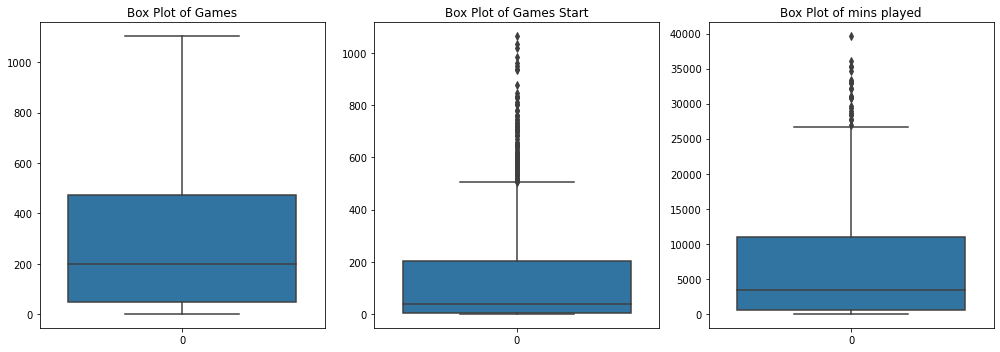

In [110]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.boxplot(data=final_df['games'], ax=axes[0])
axes[0].set_title('Box Plot of Games')

sns.boxplot(data=final_df['games_start'], ax=axes[1])
axes[1].set_title('Box Plot of Games Start')

sns.boxplot(data=final_df['mins'], ax=axes[2])
axes[2].set_title('Box Plot of mins played')

plt.tight_layout()
plt.show()

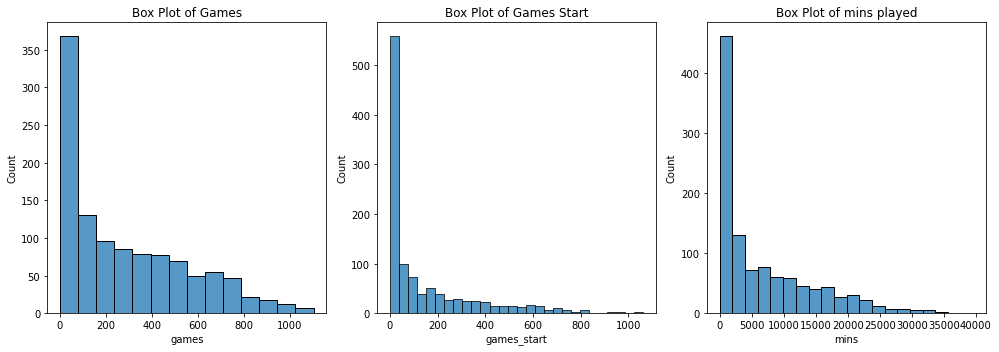

In [111]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.histplot(data=final_df['games'], ax=axes[0])
axes[0].set_title('Box Plot of Games')

sns.histplot(data=final_df['games_start'], ax=axes[1])
axes[1].set_title('Box Plot of Games Start')

sns.histplot(data=final_df['mins'], ax=axes[2])
axes[2].set_title('Box Plot of mins played')

plt.tight_layout()
plt.show()

In [112]:
#removing outliers and making the data distrubution normal
final_df1 = final_df[
    (final_df['games'] < final_df['games'].quantile(0.98)) &
    (final_df['games_start'] < final_df['games_start'].quantile(0.96)) &
    (final_df['mins'] < final_df['mins'].quantile(0.96))
]

In [113]:
final_df1

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0,0,0,0,16,0,113,1,2
1,87.0,0,0,0,0,48,27,715,2,2
2,109.0,0,0,0,0,45,5,583,1,2
3,136.0,0,0,0,0,18,0,209,1,2
4,185.0,0,0,0,0,9,8,126,1,2
...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,0,0,0,0,119,14,1832,2,2
1114,1629742.0,0,0,0,0,5,0,17,1,2
1115,1629750.0,0,0,0,0,167,49,2591,3,2
1116,1630267.0,0,0,0,0,139,26,2807,2,2


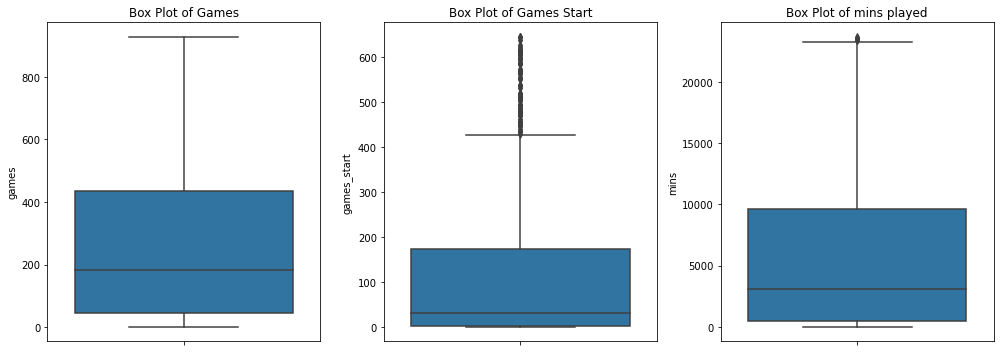

In [114]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.boxplot(y=final_df1['games'], ax=axes[0])
axes[0].set_title('Box Plot of Games')

sns.boxplot(y=final_df1['games_start'], ax=axes[1])
axes[1].set_title('Box Plot of Games Start')

sns.boxplot(y=final_df1['mins'], ax=axes[2])
axes[2].set_title('Box Plot of mins played')

plt.tight_layout()
plt.show()

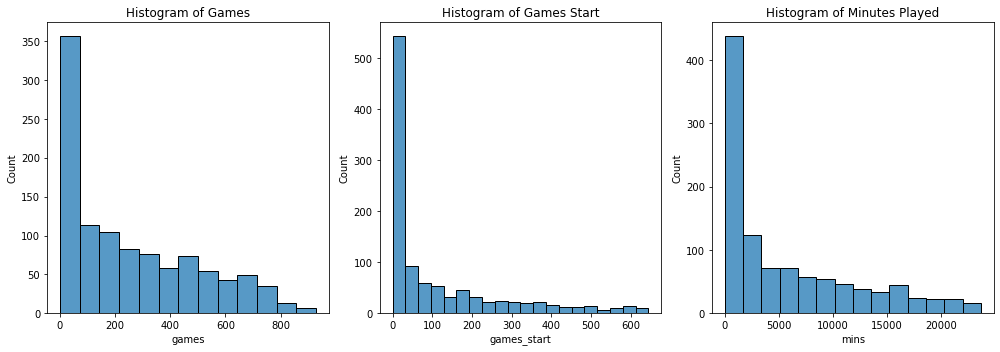

In [115]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14, 5))

sns.histplot(final_df1['games'], ax=axes[0], kde=False)
axes[0].set_title('Histogram of Games')

sns.histplot(final_df1['games_start'], ax=axes[1], kde=False)
axes[1].set_title('Histogram of Games Start')

sns.histplot(final_df1['mins'], ax=axes[2], kde=False)
axes[2].set_title('Histogram of Minutes Played')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [116]:
final_df1

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years,career_outcome
0,15.0,0,0,0,0,16,0,113,1,2
1,87.0,0,0,0,0,48,27,715,2,2
2,109.0,0,0,0,0,45,5,583,1,2
3,136.0,0,0,0,0,18,0,209,1,2
4,185.0,0,0,0,0,9,8,126,1,2
...,...,...,...,...,...,...,...,...,...,...
1113,1629740.0,0,0,0,0,119,14,1832,2,2
1114,1629742.0,0,0,0,0,5,0,17,1,2
1115,1629750.0,0,0,0,0,167,49,2591,3,2
1116,1630267.0,0,0,0,0,139,26,2807,2,2


In [117]:
co_label

{'All-Star': 0, 'Elite': 1, 'Out': 2, 'Roster': 3, 'Rotation': 4, 'Starter': 5}

## Visualization 

- Scatterplot for games played v minute of player grouped by career outcome were plotted.
- Scatterplot for games played v numbers of year in the league of player grouped by career outcome were plotted.

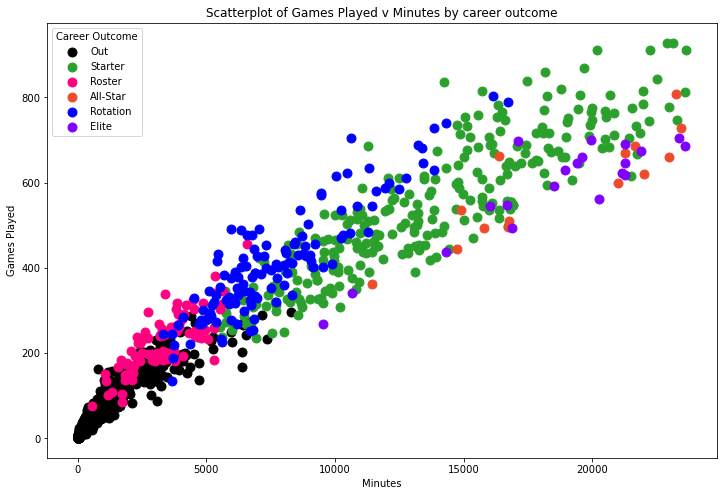

In [118]:
plt.figure(figsize=(12, 8))

custom_palette = ["#EE4B2B", "#7F00FF", "#000000", "#ff007f", "#0000FF", "#2ca02c"]

outcomes = final_df1['career_outcome'].unique()

#Creating scatter plot for each nbapersonid by career outcome
for outcome in outcomes:
    subset = final_df1[final_df1['career_outcome'] == outcome]
    plt.scatter(subset['mins'], subset['games'], 
                label=f'{career_outcome_labels[outcome]}', 
                s=80, 
                c=custom_palette[outcome])


plt.xlabel('Minutes')
plt.ylabel('Games Played')
plt.title('Scatterplot of Games Played v Minutes by career outcome')
plt.legend(title='Career Outcome', loc='upper left')

plt.show()

<strong> A trend can be observed here: players who were out of the league were those who played for a lesser amount of time and in fewer games.</strong>

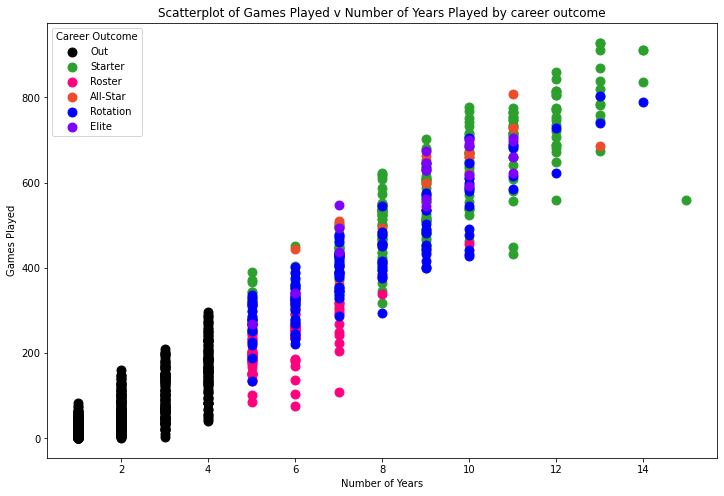

In [119]:
plt.figure(figsize=(12, 8))

custom_palette = ["#EE4B2B", "#7F00FF", "#000000", "#ff007f", "#0000FF", "#2ca02c"]

outcomes = final_df1['career_outcome'].unique()

#Creating scatter plot for each nbapersonid by career outcome
for outcome in outcomes:
    subset = final_df1[final_df1['career_outcome'] == outcome]
    plt.scatter(subset['co_years'], subset['games'], 
                label=f'{career_outcome_labels[outcome]}', 
                s=80,
                c=custom_palette[outcome])


plt.xlabel('Number of Years')
plt.ylabel('Games Played')
plt.title('Scatterplot of Games Played v Number of Years Played by career outcome')
plt.legend(title='Career Outcome', loc='upper left')

plt.show()

<strong>A trend can be observed here as well: players who were out of the league were those who played for a lesser amount of year and in fewer games.</strong>

## Preparing Model


- features and classs are seperated into X and y variable.
- X, y are further split into Train and Test Dataset with 80/20 split.
- Logistic Regression model algorithm is used for this model.

In [120]:
X = final_df1[['All NBA First Team',
              'All NBA Second Team',
              'All NBA Third Team',
              'all_star_game',
              'games','games_start',
              'mins',
              'co_years']]

y = final_df1['career_outcome']

In [121]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=21)

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)


# Predict using the trained model
y_pred = lr_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Model: {round(accuracy*100)}%")

Accuracy of Model: 93%


## Conclusion

<strong>The model that we prepared predicts the career outcome with the accuracy of <strong><span style="color:green">93%</span>.</strong>

## Preparing Prediction data for model 

- This data consist of players drafted from 2018 to 2021.

In [123]:
players_predict= pd.merge(career_df,players_df, on=['nbapersonid','season'], how='right')

In [124]:
players_predict= players_predict[(players_predict['draftyear'] >= 2018) & (players_predict['draftyear'] <= 2021) ]
players_predict['co_years'] = players_predict['season'] - players_predict['draftyear']

In [125]:
columns_to_drop = ['season', 'Defensive Player Of The Year_rk','Most Valuable Player_rk','draftyear']

# Drop the specified columns
players_predict = players_predict.drop(columns=columns_to_drop)
players_predict = players_predict.loc[:, ~players_predict.columns.duplicated()]

In [126]:
players_predict=players_predict.sort_values(by=["nbapersonid"]) 


In [127]:
player_grouped_df = {
    'All NBA First Team': 'first',  
    'All NBA Second Team': 'first',
    'All NBA Third Team': 'first',
    'all_star_game': 'first',
    'games': 'sum',
    'games_start': 'sum',
    'mins': 'sum',
    'co_years':'max'
}
players_predict = players_predict.groupby(['nbapersonid']).agg(player_grouped_df).reset_index()
players_predict

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years
0,1628238.0,NaN,NaN,NaN,None,2,0,7,3
1,1628959.0,NaN,NaN,NaN,None,10,1,120,0
2,1628960.0,NaN,NaN,NaN,None,192,101,4198,3
3,1628961.0,NaN,NaN,NaN,None,22,0,87,2
4,1628962.0,NaN,NaN,NaN,None,32,6,252,1
...,...,...,...,...,...,...,...,...,...
381,1630692.0,NaN,NaN,NaN,None,2,0,6,0
382,1630695.0,NaN,NaN,NaN,None,3,0,31,0
383,1630758.0,NaN,NaN,NaN,None,5,0,74,0
384,1630787.0,NaN,NaN,NaN,None,3,0,46,1


In [128]:
players_predict['All NBA First Team'] = players_predict['All NBA First Team'].apply(lambda x: 1 if x == 1.0 else 0)
players_predict['All NBA Second Team'] = players_predict['All NBA Second Team'].apply(lambda x: 1 if x == 1.0 else 0)
players_predict['All NBA Third Team'] = players_predict['All NBA Third Team'].apply(lambda x: 1 if x == 1.0 else 0)
players_predict['all_star_game'] = players_predict['all_star_game'].apply(lambda x: 1 if x == True else 0)

In [129]:
players_predict

,nbapersonid,All NBA First Team,All NBA Second Team,All NBA Third Team,all_star_game,games,games_start,mins,co_years
0,1628238.0,0,0,0,0,2,0,7,3
1,1628959.0,0,0,0,0,10,1,120,0
2,1628960.0,0,0,0,0,192,101,4198,3
3,1628961.0,0,0,0,0,22,0,87,2
4,1628962.0,0,0,0,0,32,6,252,1
...,...,...,...,...,...,...,...,...,...
381,1630692.0,0,0,0,0,2,0,6,0
382,1630695.0,0,0,0,0,3,0,31,0
383,1630758.0,0,0,0,0,5,0,74,0
384,1630787.0,0,0,0,0,3,0,46,1


## Passing Data through Model 

- The dataframe is passed through model for prediction.
- Also the probability of the player falling into the partiular class out outcome is calculated
- The result is saved into list and the list is coverted into a dataframe
- This results dataframe was transformed into table using dash because of lack of information found on Reactable using python this approach was selected.

In [130]:
selected_columns = ['All NBA First Team',
                    'All NBA Second Team',
                    'All NBA Third Team',
                    'all_star_game',
                    'games',
                    'games_start',
                    'mins',
                    'co_years']

new_players = players_predict[selected_columns]



ss = StandardScaler()
ss.fit(new_players) 

new_data_scaled = ss.transform(new_players)


predicted_classes = lr_model.predict(new_data_scaled)
predicted_probabilities = lr_model.predict_proba(new_data_scaled)

data = []

for player_id, predicted_class, probabilities in zip(players_predict['nbapersonid'], 
                                                     predicted_classes, 
                                                     predicted_probabilities):
    playerdata = {
        'nbapersonid': player_id,
        'Class': career_outcome_labels[predicted_class]
    }
    
    for class_label, probability in zip(lr_model.classes_, probabilities):
        probability_percentage = round(probability * 100, 2)
        playerdata[f'{career_outcome_labels[class_label]} Probability'] = probability_percentage
    
    data.append(playerdata)

# Create a DataFrame from the collected data
results = pd.DataFrame(data)

# Print the DataFrame
results
    

,nbapersonid,Class,All-Star Probability,Elite Probability,Out Probability,Roster Probability,Rotation Probability,Starter Probability
0,1628238.0,Roster,0.00,0.00,0.00,99.82,0.17,0.00
1,1628959.0,Out,0.00,0.00,99.99,0.01,0.00,0.00
2,1628960.0,Starter,0.84,0.75,0.00,0.00,0.46,97.94
3,1628961.0,Roster,0.00,0.00,0.24,98.50,1.22,0.04
4,1628962.0,Out,0.00,0.00,81.12,17.69,1.10,0.09
...,...,...,...,...,...,...,...,...
381,1630692.0,Out,0.00,0.00,99.99,0.01,0.00,0.00
382,1630695.0,Out,0.00,0.00,99.99,0.01,0.00,0.00
383,1630758.0,Out,0.00,0.00,99.99,0.01,0.00,0.00
384,1630787.0,Out,0.00,0.00,85.53,14.24,0.22,0.01


In [131]:
player_name = player_data[['nbapersonid','player']]

In [132]:
final_result = pd.merge(player_name, results, on='nbapersonid', how='inner')
final_result = final_result.drop_duplicates(subset = ["nbapersonid", "Class"])
final_result

,nbapersonid,player,Class,All-Star Probability,Elite Probability,Out Probability,Roster Probability,Rotation Probability,Starter Probability
0,1629027,Trae Young,All-Star,92.62,7.33,0.00,0.00,0.00,0.05
4,1629016,Omari Spellman,Rotation,0.03,0.04,37.38,6.53,44.80,11.22
6,1628989,Kevin Huerter,Starter,25.11,32.08,0.00,0.00,0.00,42.81
10,1629168,B.J. Johnson,Roster,0.00,0.00,0.00,99.49,0.50,0.01
14,1629121,Jaylen Adams,Roster,0.00,0.00,0.23,95.17,4.42,0.17
...,...,...,...,...,...,...,...,...,...
867,1630555,Joel Ayayi,Out,0.00,0.00,99.99,0.01,0.00,0.00
868,1630692,Jordan Goodwin,Out,0.00,0.00,99.99,0.01,0.00,0.00
869,1630225,Isaiah Todd,Out,0.00,0.00,99.99,0.01,0.00,0.00
870,1630648,Jordan Schakel,Out,0.00,0.00,99.99,0.01,0.00,0.00


## Converting Dataframe into Table 

In [152]:
pip install pandas dash

Note: you may need to restart the kernel to use updated packages.


In [153]:
import pandas as pd
import dash
import dash_html_components as html
from dash import dash_table

app = dash.Dash(__name__)

# Define the app layout
app.layout = html.Div([
    dash_table.DataTable(
        id='table',
        columns=[{'name': col, 'id': col} for col in final_result.columns],
        data=final_result.to_dict('records'),
        style_data={'whiteSpace': 'normal'},  # Adjust height and width here
        style_cell={'fontSize': '11px'}  # Adjust font size here
    )
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)

<strong>Zion Williamson (<span style="color:green">Starter: 81.26%</span>)</strong>
<br>
Zion is considered an All Star or a player with potential at the Elite level. The reason he is predicted as a Starter by the model is because the numbers he is expected to achieve have not been attainable due to injury and the missed games. This prediction is accurate based on the provided data.
<br>
<br>
<strong>Shai Gilgeous-Alexander (<span style="color:green">Elite: 55.67%</span>)</strong>
<br>
Shai is an amazing player with Elite level potential. The model comprises data only up until the year 2021. Nonetheless, this prediction is spot on. In the 2022-23 season, Shai finished 5th overall on MVP voting with averaging 31.4 ppg. I really strong belief is held that he will win the MVP in his career and evolve into an incredible player.
<br>
<br>
<strong>James Wiseman (<span style="color:red">Out: 99.99%</span>)</strong><br>
<strong>Josh Giddey (<span style="color:red">Out: 99.9%</span>)</strong><br>
The accuracy of the prediction is true for James Wiseman and Josh Giddey due to their respective draft years of 2020 and 2021. As there exists insufficient data regarding them, the model has projected them to be out of the league. Based on the available data and information, this prediction is accurate. However, with a complete dataset up to the present time, the prediction could potentially differ slightly, as Josh Giddey is turning out to be a promising player. Furthermore, observing James Wiseman's current performance metrics does not align with feature of being out of the league player.

  

## Conclusion

<strong>If I were granted the opportunity to enhance this model further or allocate additional time to its development, I would implement several changes. Firstly, I would focus on amassing a larger volume of data, as an increased dataset has proven to enhance the performance of models during training.</strong>
<br>

<strong>Additionally, I would add a broader range of performance metrics, such as points, rebounds, assists, and other factors that pertain to individual player achievements. Incorporating these metrics would undoubtedly contribute to the refinement of the machine learning model, given that the expansion of features typically results in improved performance.</strong>
<br>

<strong>As per algorithm selection, while I selected Logistic Regression algorithm for this model, If i had more time and a different approach, I would conduct experiments with other algorithms like Random Forest, Decision Tree, Support Vector Machines (SVM), and other classification methods. Through this experimentation, I would evaluate the models based on various performance metrics and subsequently select the model that performs better.</strong>

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

## Calculating total offensive rebound percentage.

### Data Preparation 

- Only OKC data is selected.
- Game 81 and Game 82 is removeed fromm the dataframe.
- Game 81 row is saved in different dataframe.


In [135]:
rebounding_df = rebounding_data[rebounding_data['team']=='OKC']
rebounding_df.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714


In [136]:
predict_df = rebounding_df[(rebounding_df['game_number'] == 81)]
predict_df

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
2399,OKC,UTA,2023-04-06,81,21,61,0.344262


In [137]:
rebounding_df = rebounding_df[~rebounding_df['game_number'].isin([81,82])]
rebounding_df.head()

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714


## Rebound Prediction.

As stated in the question rebound is calculated using total number of offensive rebounds divided by the total number of offensive rebound chance.

In [138]:
oreb_pct_81 = sum(rebounding_df['offensive_rebounds']) / sum(rebounding_df['off_rebound_chances'])
print(f'The offensive rebound prediction for game 81: {oreb_pct_81:.6f}')

The offensive rebound prediction for game 81: 0.288690


## Regression model.

Let's build a model to predict the offensive rebound percentange we have.

In [139]:
rebounding_df

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
19,OKC,MIN,2022-10-19,1,20,63,0.317460
63,OKC,DEN,2022-10-22,2,15,56,0.267857
81,OKC,MIN,2022-10-23,3,15,57,0.263158
107,OKC,LAC,2022-10-25,4,26,71,0.366197
135,OKC,LAC,2022-10-27,5,14,49,0.285714
...,...,...,...,...,...,...,...
2267,OKC,CHA,2023-03-28,76,11,49,0.224490
2287,OKC,DET,2023-03-29,77,14,49,0.285714
2297,OKC,IND,2023-03-31,78,13,49,0.265306
2342,OKC,PHX,2023-04-02,79,20,56,0.357143


## Data Preparation.

- Removed column 'team', 'gamedate', 'games_number', 'offensive_rebounds' and 'off_rebound_chances' were dropped
- One Hot Encoding in performed for 'opp_team' column.
- 'opp_team' column is dropped and rebounding_df is concatinated with dummies dataframe.
- one column with 'opp_team' column is dropped to avoid one-hot encoding trap(dummy varriable trap).

In [140]:
rebounding_df = rebounding_df.drop(['team', 'gamedate','game_number'], axis=1)

In [141]:
rebounding_df.head()

,opp_team,offensive_rebounds,off_rebound_chances,oreb_pct
19,MIN,20,63,0.317460
63,DEN,15,56,0.267857
81,MIN,15,57,0.263158
107,LAC,26,71,0.366197
135,LAC,14,49,0.285714


In [142]:
dummies = pd.get_dummies(rebounding_df.opp_team)
dummies

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,NYK,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2287,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2297,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [143]:
rebounding_df = pd.concat([rebounding_df, dummies], axis=1)
rebounding_df.head()

,opp_team,offensive_rebounds,off_rebound_chances,oreb_pct,ATL,BKN,BOS,CHA,CHI,CLE,...,NYK,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
19,MIN,20,63,0.317460,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,DEN,15,56,0.267857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,MIN,15,57,0.263158,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,LAC,26,71,0.366197,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,LAC,14,49,0.285714,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [144]:
rebounding_df = rebounding_df.drop(['offensive_rebounds','off_rebound_chances','opp_team', 'ATL'], axis=1)
rebounding_df.head()

,oreb_pct,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,NYK,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
19,0.317460,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0.267857,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0.263158,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0.366197,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0.285714,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Building Model

- features and classs are seperated into X and y variable where y is rebound percentange.
- X,y are divided into train and test dataset with 80/20 split.
- Model is trained using the train dataset.
- The model only accepts Opposite team value right now.

In [145]:
X = rebounding_df.drop(['oreb_pct'], axis='columns')
X.head()

,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,HOU,...,NYK,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
81,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
107,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
y = rebounding_df['oreb_pct']
y.head()

19     0.317460
63     0.267857
81     0.263158
107    0.366197
135    0.285714
Name: oreb_pct, dtype: float64

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=21)

In [148]:
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [149]:
predict_df

,team,opp_team,gamedate,game_number,offensive_rebounds,off_rebound_chances,oreb_pct
2399,OKC,UTA,2023-04-06,81,21,61,0.344262


In [150]:
#To find column position is UTA 
opp_team_index = np.where(X.columns == 'UTA')[0][0]
opp_team_index

26

In [151]:

x = np.zeros(len(X.columns))
if opp_team_index >= 0:
    x[opp_team_index] = 1

data = pd.DataFrame([x], columns=X.columns)

predict_oreb = regression_model.predict(data)[0]

print(f"Predicted outcome: {predict_oreb:.6f}")

Predicted outcome: 0.320167


## Conclusion

The calculated offensive rebound percentage (oreb_pct) using the conventional method outlined in the question resulted a value of <strong>0.289356</strong>, showing a deviation of approximately 5% from the actual offensive rebound percentage. However, the value predicted by the linear regression model I developed is <strong>0.320167</strong>, which is notably closer to the actual value.

Offensive Rebound %: <strong><span style="color:green"> 32.0167%</span></strong> 

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.9356% 

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong>  
Indeed, the previously mentioned approach is rather inconvenient. Based on the presented scenario, we must develop a model that can forecast offensive rebounds using specific player data. It's crucial to monitor all offensive rebound metrics in games against each team, as this data significantly impacts the model's construction. It's possible that we might overlook whether a player excels against certain teams, while another player shines against different opponents. Identifying such nuances becomes challenging through simple observation, which is where machine learning steps in. Machine learning identifies patterns within the data we supply. There could be instances where our team gains advantages against particular opponents, resulting in strong rebounding performances. Conversely, we might face disadvantages against other teams, leading to fewer rebounds. This intricate interplay between performing well against certain teams and struggling against others bound numerous factors, including player matchups, injuries, and game strategies.

To overcome these complexities, it's best to have a dataset that evaluate a player's contributions against all teams, incorporating offensive rebound metrics. With this data in hand, the next step involves training the model using the dataset. When aiming to forecast offensive rebound percentages, input features like the playing lineup and the opponent's team become essential. By providing these features, the model can then generate predictions for offensive rebounds, offering valuable insights.

What occurs with the model I suggested building is that it considers the players' lineup for the game. In cases when a player is injured and unable to play, their name is excluded when predicting the game's outcome using the model. Instead, we incorporate information about the player who will be playing. This enables us to generate a forecast for offensive rebounds that is influenced by the active player's contributions and who are playing.


### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 3:</span></strong>  
Potential weaknesses of the simple average model
- This model does not take any variables or features that could impact the game. The basic average model lacks reliability when it comes to predicting offensive rebounds for games, as it fails to consider factors that could influence the game. Relying on this model for predicting offensive rebounds would result into a constant value, irrespective of the opposing team and the players participating in the game. This unchanging value is demonstrated in the scenario described in Question 1, where we predict an offensive rebound percentage for game 81 against Utah using the simple average model, resulting in a value of 28.9356%. This value would remain unaffected even if the opponent were different, or if a highly effective rebounder from our team were unable to play. Similarly, the value would remain the same if significant players from the opposing team were absent from the game.
<br>

- If the team performs exceptionally well in certain games, the data we gather may become skewed, as the mean can be heavily influenced by a single standout performance. In the context of this model, if we have an outstanding game where we achieve a substantial number of offensive rebounds and subsequently calculate the mean, it will be predominantly bais by this particular value, leading to a considerable manipulation of the overall mean.
<br>

- There is no recognition of patterns through the rebounding metrics provided in the data. This model is merely a basic calculation of averages. It does not possess the capacity of a machine learning model, which learns to discern patterns from the data it's provided with.
<br>
In Question 1, I developed a standard linear regression model that took only the opponent's name as input to forecast the team's offensive rebound percentage. This model outperformed the simple average model, primarily due to its ability to detect patterns within the provided data – a capability that is not present in the basic average model. Through machine learning, we can effectively uncover and comprehend patterns hidden within the data, enabling us to predict outcomes supported by data driven decision-making.

In that particular question, my focus was solely on a single input feature: the opposing team. However, we have the potential to enhance the model's performance even further by incorporating additional features that apply influence on offensive rebounds during games. 
Moving on to Question 2, I proposed the creation of a model that considers both the player lineup and the opponent's team as inputs. This approach fixes the concern of player unavailability due to injuries. Furthermore, to elevate the model's performance, we can implement a range of strategies such as:

- Take into account dependent factors within the game, including the pace of play, the point differential, and the arrangement of the lineup. A game with a slower tempo is more likely to result in controlled possessions, thus results in a higher offensive rebound percentage. Similarly, in situations where your team is significantly trailing, there could be an increased emphasis on offensive rebounds as a strategy to regain possession.
<br>

- By analyzing the opposing team and its players, I previously discussed a model that utilizes the opponent's team as an input. However, what if we could incorporate not only the opponent's team but also the lineup and performance metrics of their players? This expanded approach could significantly enhance our ability to predict offensive rebounds and search into their game strategy. By comprehensively understanding their gameplay, we can strategically devise a more effective game plan against them. Ultimately, this strategic refinement could translate into an increase in victories for our basketball team.
<br>

- Employing the model for live, integrated updates presents a fascinating possibility. During a game, we observe players entering and exiting the court, instances of rest, and adjustment in the coaching strategy. Imagine if we could construct a model that offers real-time updates, allowing it to adapt its predictions in response to these dynamic changes. For example, as a player is substituted into the game, the model could instantly adjust its forecasts to reflect this shift. This level of real-time responsiveness could provide us with more accurate insights and predictions throughout the course of the game.
